In [13]:
import json
import requests
import bs4
import re
from bs4 import BeautifulSoup
res= requests.get('https://fubon-ebrokerdj.fbs.com.tw/Z/ZG/ZG_D.djhtm')


print(res.text)
#外資當日買超前50 
#統計當日外資買超情況下 股價漲和跌的佔比
#目前資料為6/4


<!DOCTYPE>
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=big5">
<script language="JavaScript"><!--
if (navigator.userAgent.toLowerCase().indexOf('msie') != -1) {
	if (navigator.userAgent.toLowerCase().match(/msie ([\d.]+)/)[1] <=10) {
		document.writeln('<script language="JavaScript" src="/z/js/jquery-latest.djjs"></script>\n');
	} else {
		document.writeln('<script language="JavaScript" src="/z/js/jquery.djjs"></script>\n');
	}
} else {
document.writeln('<script language="JavaScript" src="/z/js/jquery.djjs"></script>\n');
}
// --></script>
<script language="JavaScript" src="/z/js/jsFunction.djjs"></script>
<script language="JavaScript" src="/z/js/isSpecialKind.djjs"></script>
<script language="JavaScript" src="/z/js/mdj.js"></script>
<script type="text/javascript" src="/z/js/Applet2Canvas.djjs"></script>
<script type="text/javascript" src="/z/js/DJWebGraph.djjs"></scr

In [14]:
#圖表重現
import pandas
dfs=pandas.read_html('https://fubon-ebrokerdj.fbs.com.tw/Z/ZG/ZG_D.djhtm')
#len(dfs) 長度為3 dfs[2]為表格
data=dfs[2]

data=data.loc[1:,:]#


data
#data.loc[2:,1].str.extract('(\w+)')


0          1      2       3       4      5
1  名次       股票名稱    收盤價      漲跌     漲跌幅  買賣超張數
2   1    2105 正新  44.45   -0.85  -1.88%   9531
3   2  2633 台灣高鐵  29.00   -0.40  -1.36%   8146
4   3    2481 強茂  68.90  + 3.70  +5.67%   6923
5   4     2353 宏    NaN     NaN     NaN    NaN

In [15]:
#買超前50名稱
NAME=[]
soup=BeautifulSoup(res.text,'html.parser')
tagname=soup.select('td.t3t1 a')
#print(tagname)
for name in tagname:
    print(name.text)
    NAME.append(name.text)

#提取買超前50股票代號    
A=[0]*50
import re
for i in range(0,50):
    regex = re.compile("(\d+).*?")
    match = regex.search(NAME[i])
    
    A[i]=match.group(1)
    print(A[i])


2105  正新
2633  台灣高鐵
2481  強茂
2353  宏��
2347  聯強
2615  萬海
2527  宏璟
2344  華邦電
2324  仁寶
4938  和碩
2330  台積電
2010  春源
2027  大成鋼
2337  旺宏
2886  兆豐金
2208  台船
1909  榮成
2308  台達電
2474  可成
2314  台揚
2356  英業達
00673R期元大S＆P原油反1
3003  健和興
2408  南亞科
2354  鴻準
00881 國泰台灣5G+
2352  佳世達
2637  慧洋-KY
3711  日月光投控
2404  漢唐
3661  世芯-KY
2006  東和鋼鐵
2642  宅配通
2383  台光電
5607  遠雄港
3005  神基
2614  東森
6239  力成
2823  中壽
2049  上銀
8046  南電
6257  矽格
3189  景碩
2301  光寶科
3017  奇鋐
9945  潤泰新
2031  新光鋼
1229  聯華
8112  至上
00683L期元大美元指正2
2105
2633
2481
2353
2347
2615
2527
2344
2324
4938
2330
2010
2027
2337
2886
2208
1909
2308
2474
2314
2356
00673
3003
2408
2354
00881
2352
2637
3711
2404
3661
2006
2642
2383
5607
3005
2614
6239
2823
2049
8046
6257
3189
2301
3017
9945
2031
1229
8112
00683


In [185]:
#買超家數 漲價錢 百分比%
#soup=BeautifulSoup(res.text,'html.parser')
upprice=soup.select('td.t3r1')
number1=0
#print(upprice)
for up in upprice:
    number1=number1+1
    print(up.text)
    
number1=number1/2
print("漲家數",number1)


+ 1.90
 +9.95%
+ 0.90
 +1.72%
+ 0.10
 +0.81%
+ 1.15
 +5.88%
+ 4.00
 +6.83%
+ 0.70
 +2.66%
+ 0.80
 +1.82%
+ 0.50
 +1.72%
+ 1.05
 +3.35%
+ 0.65
 +3.31%
+ 0.65
 +3.06%
+ 1.50
 +5.26%
+ 2.50
 +2.16%
+ 1.10
 +3.20%
+ 0.45
 +2.41%
+ 1.05
 +4.02%
+ 2.55
 +5.69%
+ 0.05
 +0.22%
+ 0.40
 +3.27%
+ 1.05
 +2.49%
+ 3.00
 +2.17%
+ 0.65
 +5.83%
+ 2.35
 +9.83%
+ 2.60
 +3.52%
+ 0.75
 +2.96%
+ 0.20
 +0.60%
+ 4.20
 +6.89%
+ 0.10
 +0.35%
+ 2.10
 +5.38%
+ 0.90
 +4.50%
+ 5.00
 +4.78%
+ 0.40
 +1.66%
+ 2.00
 +1.54%
+ 0.60
 +2.84%
+ 1.05
 +2.12%
+ 0.55
 +1.86%
+ 4.00
 +3.57%
+ 3.00
 +0.50%
+ 14.00
 +4.11%
+ 0.50
 +2.46%
+ 0.40
 +0.74%
+ 0.80
 +2.38%
+ 0.15
 +1.38%
+ 1.35
 +2.70%
+ 0.80
 +1.28%
+ 0.95
 +4.40%
+ 0.35
 +1.07%
+ 2.50
 +3.33%
+ 0.20
 +1.72%
漲家數 49.0


In [186]:
#買超家數 跌價錢 百分比% 
lowprice=soup.select('td.t3g1')
number2=0
for low in lowprice:
    number2=number2+1
    print(low.text)

number2=number2/2
print("跌家數",number2)

 -0.05
 -0.19%
跌家數 1.0


In [187]:
#平盤家數(沒漲也沒跌)
number3=50-number1-number2

print("平盤家數",number3)



平盤家數 0.0


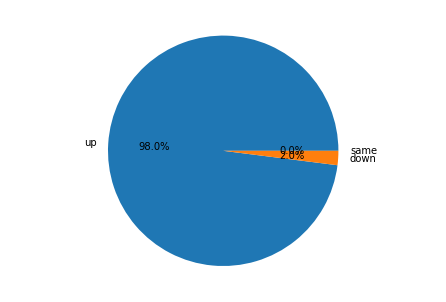

In [188]:
#百分比圖
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
topic = ['up', 'down', 'same']
numbers = [number1,number2,number3]
ax.pie(numbers, labels = topic,autopct='%1.1f%%')
plt.show()

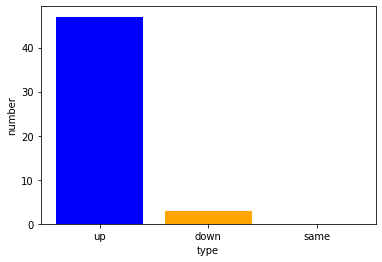

In [40]:
#長條數目圖
topic = ['up', 'down', 'same']
numbers = [number1,number2,number3]
x = np.arange(len(topic))
plt.bar(x, numbers, color=['blue', 'orange', 'green'])
plt.xticks(x, topic)
plt.xlabel('type')
plt.ylabel('number')
plt.title('')
plt.show()

In [41]:
#加權指數
res2= requests.get('https://histock.tw/stock/three.aspx?s=a')
soup2=BeautifulSoup(res2.text,'html.parser')

number=soup2.select('span.fwbig span.clr-rd')
for num in number:
    print(num.text)



17371.29
▲157.77
+0.92%


In [42]:
#提取股票代號
DATA=data.loc[2:,1].str.extract('(\d+)')#regex提取
select_df = pandas.DataFrame(DATA)#丟入pandas.DataFrame

select_df.iloc[0,0]

#股票代號存入A[]
A=[0]*50
num=0
for i in range(0,50):
    
    A[i]=select_df.iloc[i,0]
    print(A[i])
    print(num)
    num=num+1
    
#print(A[0])

2303
0
2609
1
2002
2
2344
3
2603
4
1605
5
2027
6
1802
7
00715
8
2330
9
1609
10
2023
11
2208
12
00881
13
2457
14
6257
15
2108
16
1909
17
3042
18
2393
19
6191
20
2327
21
2369
22
3034
23
3006
24
2338
25
2313
26
1101
27
2892
28
00642
29
2489
30
9105
31
2308
32
3060
33
9938
34
2031
35
2375
36
2406
37
1608
38
2436
39
4961
40
6443
41
1517
42
6278
43
2007
44
8150
45
00885
46
2913
47
4967
48
2034
49


In [177]:
#select_df

#data.loc[2:,1].str.extract('(\w+)')

In [162]:

res3= requests.get("https://fubon-ebrokerdj.fbs.com.tw/z/zc/zcl/zcl.djhtm?a=2618&c=2021-6-3&d=2021-6-09")


#print(res3.text)
#https://fubon-ebrokerdj.fbs.com.tw/z/zc/zcl/zcl_2603.djhtm

In [163]:
#提取前兩天外資買賣超B[10]為前一天B[20]為前兩天
B=[0]*999
soup=BeautifulSoup(res3.text,'html.parser')
tagnumber=soup.find_all(class_=re.compile("^t3\w1"))
#print(tagname)
k=0
for number in tagnumber:
    B[k]=number.text
    k=k+1
    #print(name.text)

    
print(B[10])    
print(B[20])
#re.sub(',' ,'',B[10])
last1=B[10].replace(",", "")#消除數字裡的逗號
last2=B[20].replace(",", "")

last1=int(last1)#str轉int
last2=int(last2)
#print(last1)


-10,291
1,870


In [293]:
#判斷哪一種 是否為前兩天續買 總共有4種排列組合
c=[0]*4

if(last1<0 and last2<0):
    c[0]=c[0]+1 #倒數前一天賣 倒數前二天賣
if(last1<0 and last2>0):
    c[1]=c[1]+1 #倒數前一天賣 倒數前二天買
if(last1>0 and last2<0):
    c[2]=c[2]+1 #倒數前一天買 倒數前二天賣
if(last1>0 and last2>0):
    c[3]=c[3]+1 #倒數前一天買 倒數前二天買


In [32]:
#讀進前50大到檔案裡
A=[]
import csv
with open('0617.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for A in rows:
        print(A)
        

print(A[15])
        


['3481', '2303', '2883', '2329', '2606', '2527', '2337', '1312', '2401', '2618', '2363', '2605', '3711', '2103', '2610', '1440', '2617', '2324', '1447', '2449', '2108', '4960', '2607', '2441', '2356', '1802', '2481', '1609', '8021', '6251', '6202', '3033', '3006', '1409', '2393', '2352', '2376', '2330', '8046', '1608', '1709', '6257', '2344', '1718', '1513', '4967', '6168', '1308', '3035', '1714']
1440


In [42]:
#重要
import re
import json
import requests
import bs4
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
B=[0]*999
c=[0]*4  #全部歸零用 or宣告用    (4種類型number)

type1=[]#紀錄各個type數量
type2=[]
type3=[]
type4=[]



for i in range(0,50):
    res3= requests.get("https://fubon-ebrokerdj.fbs.com.tw/z/zc/zcl/zcl.djhtm?a="+A[i]+"&c=2021-6-3&d=2021-6-09")
    #https://fubon-ebrokerdj.fbs.com.tw/z/zc/zcl/zcl_"+A[i]+".djhtm
    
    soup=BeautifulSoup(res3.text,'html.parser')
    tagnumber=soup.find_all(class_=re.compile("^t3\w1"))
    #print(tagname)
    k=0
    for number in tagnumber:
        B[k]=number.text
        k=k+1
        #print(name.text)

    
#    print(B[10])    
#    print(B[20])
    #re.sub(',' ,'',B[10])
    last1=B[10].replace(",", "")#消除數字裡的逗號
    last2=B[20].replace(",", "")

    last1=int(last1)#str轉int
    last2=int(last2)
#    print(last1)
    
    
    if(last1<0 and last2<0):
        c[0]=c[0]+1 #倒數前一天賣 倒數前二天賣
        type1.append(A[i])
        
    if(last1<0 and last2>0):
        c[1]=c[1]+1 #倒數前一天賣 倒數前二天買
        type2.append(A[i])
        
    if(last1>0 and last2<0):
        c[2]=c[2]+1 #倒數前一天買 倒數前二天賣
        type3.append(A[i])
        
    if(last1>0 and last2>0):
        c[3]=c[3]+1 #倒數前一天買 倒數前二天買
        type4.append(A[i])
        
    
#    for k in range(0,4):
#        print(c[k])
print(type3[0])



2105


In [43]:
for k in range(0,4):
        print(c[k])
c[0]=c[0]+1 #倒數前一天賣n-2 倒數前二天賣n-3 
c[1]=c[1]+1 #倒數前一天賣n-2 倒數前二天買n-3
c[2]=c[2]+1 #倒數前一天買n-2 倒數前二天賣n-3  n買50<10數量  n-1買50  n-2買  n-3賣
c[3]=c[3]+1 #倒數前一天買n-2 倒數前二天買n-3

12
12
14
11


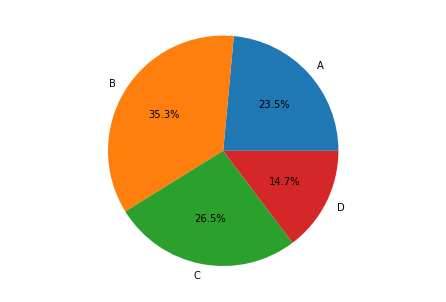

In [35]:
#百分比圖
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
topic = ['A', 'B', 'C','D']
numbers = [c[0],c[1],c[2],c[3]]
ax.pie(numbers, labels = topic,autopct='%1.1f%%')
plt.show()

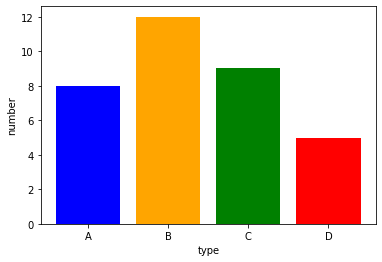

In [36]:
#長條圖
topic = ['A', 'B', 'C','D']
numbers = [c[0],c[1],c[2],c[3]]
x = np.arange(len(topic))
plt.bar(x, numbers, color=['blue', 'orange', 'green','red'])
plt.xticks(x, topic)
plt.xlabel('type')
plt.ylabel('number')
plt.title('')
plt.show()

In [44]:
#type 類型 csv 存取
import csv
with open('Type1.csv','a') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(type1)

with open('Type2.csv','a') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(type2)

with open('Type3.csv','a') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(type3)

with open('Type4.csv','a') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(type4)

In [46]:
#type 類型 csv 打開
import csv
with open('Type1.csv', newline='') as csvfile:
    rows1 = csv.reader(csvfile)
    for row1 in rows1:
        print(row1)
print(len(row1))

with open('Type2.csv', newline='') as csvfile:
    rows2 = csv.reader(csvfile)
    for row2 in rows2:
        print(row2)
print(len(row2))

with open('Type3.csv', newline='') as csvfile:
    rows3 = csv.reader(csvfile)
    for row3 in rows3:
        print(row3)
print(len(row3))

with open('Type4.csv', newline='') as csvfile:
    rows4 = csv.reader(csvfile)
    for row4 in rows4:
        print(row4)
print(len(row4))

print(row1[1])
      




['2633', '2527', '2330', '2474', '2356', '881', '2404', '3661', '2006', '3005', '3189', '9945']
12
['2615', '2344', '2027', '2337', '3003', '2637', '3711', '5607', '2031', '1229', '8112', '00683L']
12
['2105', '2481', '2353', '2347', '4938', '2208', '1909', '2314', '2408', '2352', '2383', '2823', '6257', '2301']
14
['2324', '2010', '2886', '2308', '2354', '2642', '2614', '6239', '2049', '8046', '3017']
11
2527


In [49]:


#前一天4種類型 分別有進入 今天前50的數量     (上去第2大格程式執行取得A[] regex提取前50 )
num1=0
num2=0
num3=0 
num4=0
for i in row1:
    for j in range(0,50):
        if(i==A[j]):
            num1=num1+1
print(num1)


for i in row2:
    for j in range(0,50):
        if(i==A[j]):
            num2=num2+1
print(num2)

      
for i in row3:
    for j in range(0,50):
        if(i==A[j]):
            num3=num3+1
print(num3)


for i in row4:
    for j in range(0,50):
        if(i==A[j]):
            num4=num4+1
print(num4)


12
12
14
11


In [47]:

#提取前一天前30


import csv
with open('0618.csv', newline='') as csvfile:
    rows1 = csv.reader(csvfile)
    for A in rows1:
        print(A)
#print(A[0])









#前一天4種類型 分別有進入 今天前30的數量     (上去第2大格程式執行A[] regex提取前50 )
num1=0
num2=0
num3=0 
num4=0
for i in row1:
    for j in range(0,30):
        if(i==A[j]):
            num1=num1+1
print(num1)


for i in row2:
    for j in range(0,30):
        if(i==A[j]):
            num2=num2+1
print(num2)

      
for i in row3:
    for j in range(0,30):
        if(i==A[j]):
            num3=num3+1
print(num3)


for i in row4:
    for j in range(0,30):
        if(i==A[j]):
            num4=num4+1
print(num4)

['2105', '2633', '2481', '2353', '2347', '2615', '2527', '2344', '2324', '4938', '2330', '2010', '2027', '2337', '2886', '2208', '1909', '2308', '2474', '2314', '2356', '00673R', '3003', '2408', '2354', '881', '2352', '2637', '3711', '2404', '3661', '2006', '2642', '2383', '5607', '3005', '2614', '6239', '2823', '2049', '8046', '6257', '3189', '2301', '3017', '9945', '2031', '1229', '8112', '00683L']
7
7
10
5


In [48]:
#前一天4種類型 分別有進入 今天前50的機率
ans=[num1/len(row1),num2/len(row2),num3/len(row3),num4/len(row4)]
print(num1/len(row1))
print(num2/len(row2))
print(num3/len(row3))
print(num4/len(row4))
print((num1+num2+num3+num4)/30)
#存入answer
import csv
with open('answer.csv','a') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(ans)
    
    
    

0.5833333333333334
0.5833333333333334
0.7142857142857143
0.45454545454545453
0.9666666666666667


In [179]:
print(8/30)

0.26666666666666666


In [ ]:
#